### Data Cleaning


### 1. Importing Libraries
Import the necessary libraries needed for data cleaning.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import contractions
import re

Read the CSV file named "train-balanced-sarcasm.csv" and stores it in a DataFrame named data.

In [ ]:
data = pd.read_csv("data/train-balanced-sarcasm.csv")

Output the total number of Entries in data.

In [ ]:
print("Total Number of Entries:",len(data))

Total Number of Entries: 1010826


### 2. Removing Features
Remove the features author, subreddit, date and created_utc for generalizability.  
Remove the features score, ups, downs as these values can change with time, and an initial sacarstic comment will have these values set to zero.

In [ ]:
columns_to_remove = ['author','subreddit','date','created_utc','score','ups','downs']
data_2 = data.drop(columns_to_remove, axis=1)

In [ ]:
print(data_2.head())

   label                                            comment  \
0      0                                         NC and NH.   
1      0  You do know west teams play against west teams...   
2      0  They were underdogs earlier today, but since G...   
3      0  This meme isn't funny none of the "new york ni...   
4      0                    I could use one of those tools.   

                                      parent_comment  
0  Yeah, I get that argument. At this point, I'd ...  
1  The blazers and Mavericks (The wests 5 and 6 s...  
2                            They're favored to win.  
3                         deadass don't kill my buzz  
4  Yep can confirm I saw the tool they use for th...  


### 3. Searching for unusable text  

Remove comments that are NA or only have numerical values which could possibly indicate the comment id.

Check for NA values in the label, comment, parent_comment columns

In [ ]:
# Searching for NA values
print(data_2[data_2["label"].isna()].head())
print("Number of NA labels:",len(data_2[data_2["label"].isna()]))
print()
print(data_2[data_2["comment"].isna()].head())
print("Number of NA text in comment:",len(data_2[data_2["comment"].isna()]))
print()
print(data_2[data_2["parent_comment"].isna()].head())
print("Number of NA text in parent comment:",len(data_2[data_2["parent_comment"].isna()]))

Empty DataFrame
Columns: [label, comment, parent_comment]
Index: []
Number of NA labels: 0

        label comment                                     parent_comment
602         0     NaN                               Any recommendations?
56269       1     NaN  LPL shitshow, EU LCS shitshow. What isn't a sh...
68590       1     NaN  Car fires smell delicious to you? You should p...
135348      0     NaN                                 Will do. EU or NA?
199910      0     NaN                                      woah, thanks.
Number of NA text in comment: 55

Empty DataFrame
Columns: [label, comment, parent_comment]
Index: []
Number of NA text in parent comment: 0


Remove comments with NA values and print the total number of Entries after removing NA

In [ ]:
# Removing comments with NA values
data_2 = data_2[~data_2["comment"].isna()]
print("Total Number of Entries after removing NA:", len(data_2))

Total Number of Entries after removing NA: 1010771


Identify entries in the comment and parent_comment column which consists of only digits and print the number of rows of such entries

In [ ]:
# Searching for entries that are just numerical values
rows_with_numbers = data_2[data_2['comment'].apply(lambda x: x.isdigit())]
print(rows_with_numbers.head())
print("Number of rows with comments as digits:", len(rows_with_numbers))
print()
rows_with_numbers_parent = data_2[data_2['parent_comment'].apply(lambda x: x.isdigit())]
print(rows_with_numbers_parent.head())
print("Number of rows with parent_comments as digits:", len(rows_with_numbers_parent))


      label  comment           parent_comment
25        0      466        467 A lovely way!
42        0  1571049                1,571,048
1218      0        4      sv_timebetweenducks
1631      0        7  Is this for gen 6 or 7?
2190      0      412              IA brother?
Number of rows with comments as digits: 530

       label                               comment parent_comment
4993       0                      That's so fetch.             42
5444       0                     Car mechanic 2015          14373
6743       0                                     5              7
7007       0  You can't even see who the faces are           2016
15687      1                                Years?              5
Number of rows with parent_comments as digits: 172


Remove digit entries and print the total number of Entries left

In [ ]:
# Removing digit entries
data_3 = data_2[~data_2['comment'].apply(lambda x: x.isdigit())]
data_3 = data_3[~data_3['parent_comment'].apply(lambda x: x.isdigit())]
print("Total Number of Entries after removing digit entries:", len(data_3))

Total Number of Entries after removing digit entries: 1010119


### 4. Reducing Size of Dataset
There are too many entries in the dataset (slightly more than a million). We want to reduce the size of the dataset as processing time can become too long for feature engineering and model training.

Utilize seaborn to create a count plot to visualize the distribution of labels in the label column.

Total Number of Entries before reduction: 1010119
Distribution of Labels
label
1    505291
0    504828
Name: count, dtype: int64


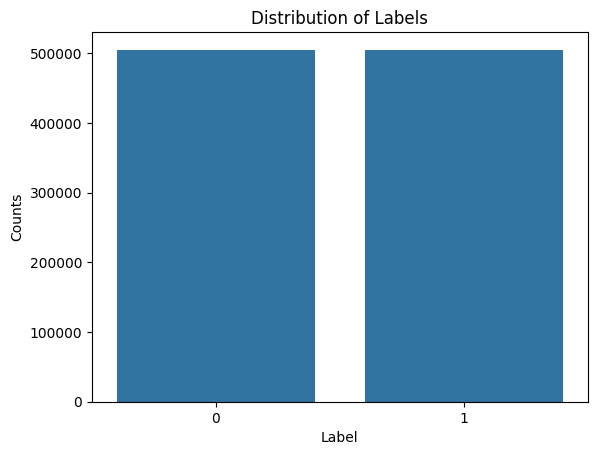

In [ ]:
sns.countplot(data_3, x = "label")
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Counts")

print("Total Number of Entries before reduction:",len(data_3))
print("Distribution of Labels")
print(data_3["label"].value_counts())


The plot above shows that the original dataset is balanced. We can proceed to reduce dataset with stratified sampling to maintain label ratios.

Split the original dataset (data_3) into features (X) and labels (y). Utilize train_test_split to create a reduced dataset (data_reduced) with a test size of 80%, stratified by the label column, and a random seed of 42. Combine the features and labels into the reduced dataset and reset the index for consistency.

In [ ]:
# Using stratified
X = data_3.drop('label', axis = 1)
y = data_3['label']
X_sample, _, y_sample, _ = train_test_split(X, y, test_size = 0.8, stratify = y, random_state = 42)
data_reduced = pd.concat([X_sample,y_sample], axis = 1)
data_reduced = data_reduced.reset_index()
data_reduced.drop('index', axis = 1, inplace = True)

Utilize seaborn to create a count plot to visualize the distribution of labels in the label column after reduction

Total Number of Entries after reduction: 202023
Distribution of Labels
label
1    101058
0    100965
Name: count, dtype: int64


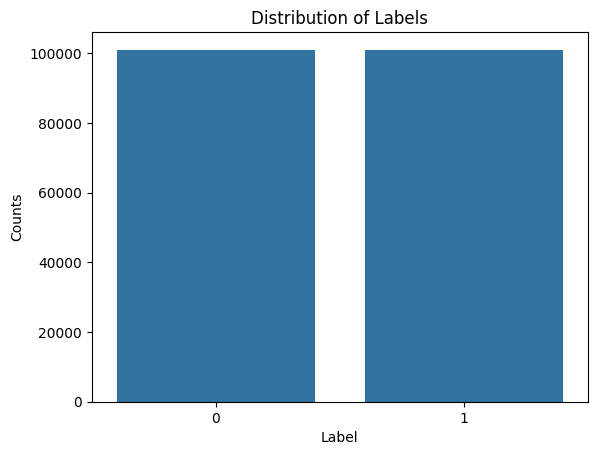

In [ ]:
sns.countplot(data_reduced, x = "label")
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Counts")

print("Total Number of Entries after reduction:",len(data_reduced))
print("Distribution of Labels")
print(data_reduced["label"].value_counts())

Size of dataset has been reduced while keeping data balanced.

### 5. Further Data Cleaning
Remove contractions, change to lower case, remove links, usernames and emails.

In [ ]:
#removing contractions
data_reduced['comment'] = data_reduced['comment'].apply(contractions.fix)
data_reduced['parent_comment'] = data_reduced['parent_comment'].apply(contractions.fix)

In [ ]:
#change to lower case
data_reduced['comment'] = data_reduced["comment"].apply(lambda text:text.lower())
data_reduced['parent_comment'] = data_reduced["parent_comment"].apply(lambda text:text.lower())

In [ ]:
#function to remove links from text
def remove_links(text):
    text_1 = re.sub(r"[(+*)]\S*https?:\S*[(+*)]", "", text)
    text_2 = re.sub('http://\S+|https://\S+', " ", text_1)
    text_3 = re.sub(r"[\(\[].*?[\)\]]", " ", text_2)
    return text_3

#function to remove email addresses
def remove_emails(text):
    text_1 = re.sub(r'\S+@\S+', '', text)
    return text_1

#function to remove usernames
def remove_usernames(text):
    text_1 = re.sub(r'@\w+', '', text)
    return text_1

def remove_links_emails_usernames(text):
    text_1 = remove_links(text)
    text_2 = remove_emails(text_1)
    text_3 = remove_usernames(text_2)
    return text_3

#removing links, emails and usernames
data_reduced['comment'] = data_reduced['comment'].apply(remove_links_emails_usernames)
data_reduced['parent_comment'] = data_reduced['parent_comment'].apply(remove_links_emails_usernames)

Save the clean data as a pickle for future use. Pickle is used for easy serialization of data for future use.

In [ ]:
data_reduced.to_pickle("data/data_cleaned.pkl")